In [1]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline


In [2]:
# generate data
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({"y":y, "x":x})
df["constant"] = 1
from platform import python_version

print(python_version())


3.6.10


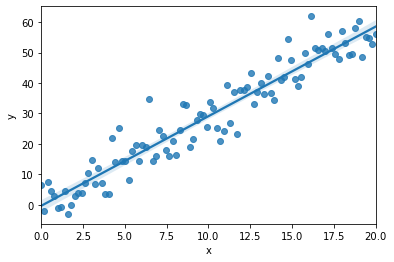

In [3]:
df
# plot
sns.regplot(df.x, df.y);

In [4]:
# split features and target
X = df[["constant", "x"]]
# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1061.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.29e-54
Time:                        12:07:06   Log-Likelihood:                -307.20
No. Observations:                 100   AIC:                             618.4
Df Residuals:                      98   BIC:                             623.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.3803      1.047     -0.363      0.717      -2.459       1.698
x              2.9466      0.090     32.568      0.000       2.767       3.126
==============================================================================
Omnibus:                        5.557   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.961
Skew:                           0.520   Prob(JB):                       0.0837
Kurtosis:                       3.330   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# define likelihood function
def MLERegression(params):
 intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
 yhat = intercept + beta*x # predictions
# next, we flip the Bayesian question
# compute PDF of observed values normally distributed around mean (yhat)
# with a standard deviation of sd
 negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
# return negative LL
 return(negLL)

In [6]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = "Nelder-Mead", 
 options={"disp": True})

Optimization terminated successfully.
         Current function value: 307.204757
         Iterations: 112
         Function evaluations: 198


In [7]:
print(results)

 final_simplex: (array([[-0.38024492,  2.94662236,  5.22316657],
       [-0.38031102,  2.94662987,  5.2232341 ],
       [-0.38018972,  2.9466151 ,  5.22320742],
       [-0.38019722,  2.94663005,  5.22322021]]), array([307.2047571 , 307.2047571 , 307.20475711, 307.20475712]))
           fun: 307.204757103085
       message: 'Optimization terminated successfully.'
          nfev: 198
           nit: 112
        status: 0
       success: True
             x: array([-0.38024492,  2.94662236,  5.22316657])


In [8]:
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)

,coef
constant,-0.3802
x,2.9466
